Osnabrück University - Computer Vision (Winter Term 2021/22) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 04: Segmentation and Color

## Introduction


This week's sheet should be solved and handed in before the end of **Tuesday, November 30, 2021**. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (the exponential function) [0 Points]

This exercise is supposed to be very easy, does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is an *exponential function*? How can it be characterized? What is special about $e^x$?

YOUR ANSWER HERE

**b)** How is the exponential function defined for complex arguments? In what way(s) does this generalize the real case?

YOUR ANSWER HERE

**c)** The complex exponential function allows to define a mapping $\mathbb{R}\to\mathbb{C}$ by $x\mapsto e^{ix}$? How does the graph of this mapping look like? Where are the points $e^{2\pi i\frac mn}$ for $m=0,...,n\in\mathbb{N}$ located on this graph?

YOUR ANSWER HERE

In [ ]:
# YOUR CODE HERE

## Assignment 1: Histogram-based segmentation [5 Points]

### a) Histogram-based segmentation

What is histogram-based segmentation? What are it's goals, benefits, and problems?

### b) Threshold computation

There exist different methods to automatically determine a threshold for an image. Find at least two that are provided by scikit-image and describe them in more detail. Then apply them to the images `schrift.png` and `pebbles.jpg`.

Otsu's method, in the simplest form, returns a single intensity threshold that separate pixels into two classes, foreground and background. This threshold is determined by minimizing intra-class intensity variance, or equivalently, by maximizing inter-class variance. It is exhaustively searched for the threshold that minimizes the intra-class variance, defined as a weighted sum of variances of the two classes. Finally, the desired threshold corresponds to the maximum.


In [ ]:
# Run this cell to get an impression of how the histograms look

%matplotlib inline
import matplotlib.pyplot as plt
from imageio import imread

img1 = imread('images/schrift.png')
img2 = imread('images/pebbles.jpg') 

plt.figure(figsize=(15, 10)) 
plt.gray()
plt.subplot(2,2,1)
plt.axis('off')
plt.imshow(img1)
plt.subplot(2,2,2)
plt.hist(img1.flatten(), 256, (0, 255))
plt.subplot(2,2,3)
plt.axis('off')
plt.imshow(img2)
plt.subplot(2,2,4)
plt.hist(img2.flatten(), 256, (0, 255))
plt.show()

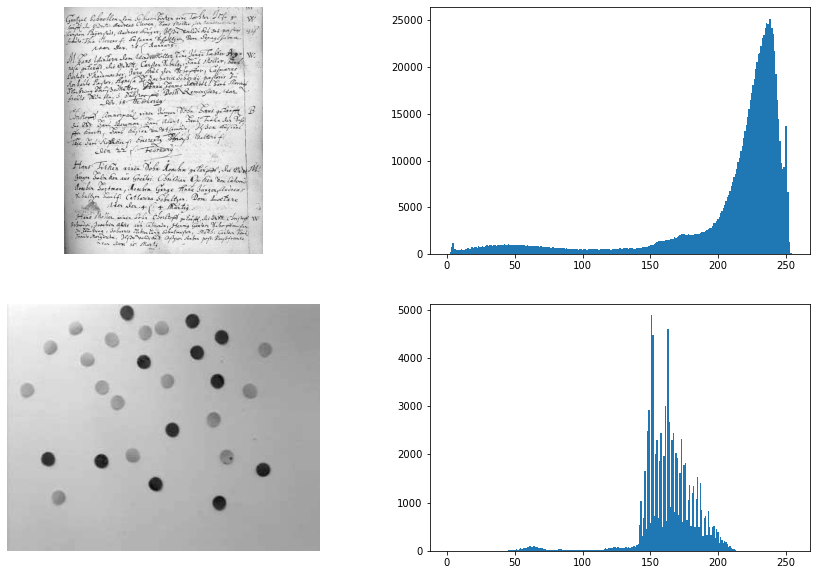

In [1]:
# Run this cell to get an impression of how the histograms look

%matplotlib inline
import matplotlib.pyplot as plt
from imageio import imread

img1 = imread('schrift.png')
img2 = imread('pebbles.jpg') 

plt.figure(figsize=(15, 10)) 
plt.gray()
plt.subplot(2,2,1)
plt.axis('off')
plt.imshow(img1)
plt.subplot(2,2,2)
plt.hist(img1.flatten(), 256, (0, 255))
plt.subplot(2,2,3)
plt.axis('off')
plt.imshow(img2)
plt.subplot(2,2,4)
plt.hist(img2.flatten(), 256, (0, 255))
plt.show()

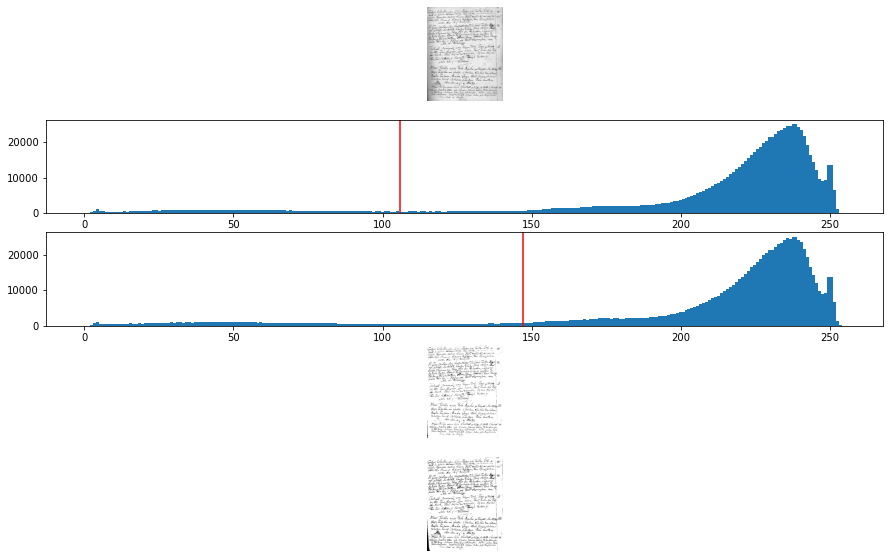

In [123]:
%matplotlib inline
import matplotlib.pyplot as plt
from imageio import imread
from skimage.filters import threshold_minimum, threshold_otsu

img = imread('schrift.png') # 'pebbles.jpg' or 'schrift.png'

thresh = threshold_minimum(img)
thresh2 = threshold_otsu(img)
segments = img > thresh
segments2 = img > thresh2


plt.figure(figsize=(15, 10))
plt.gray()
plt.subplot(5,1,1); plt.axis('off'); plt.imshow(img)
plt.subplot(5,1,2); plt.hist(img.flatten(), 256, (0,255))
plt.axvline(thresh, color='r')
plt.subplot(5,1,3); plt.hist(img.flatten(), 256, (0,255))
plt.axvline(thresh2, color='r')
plt.subplot(5,1,4); plt.axis('off'); plt.imshow(segments)
plt.subplot(5,1,5); plt.axis('off'); plt.imshow(segments2)
plt.show()

### c) Shading

Shading may cause a problem to histogram based segmentation. In the lecture (CV-07 slide 13), it was proposed to compute a shading image to deal with that problem. Apply this approach to the images `schrift.png` and `pebbles.jpg`. You may use filter functions from scikit-image for this exercise.

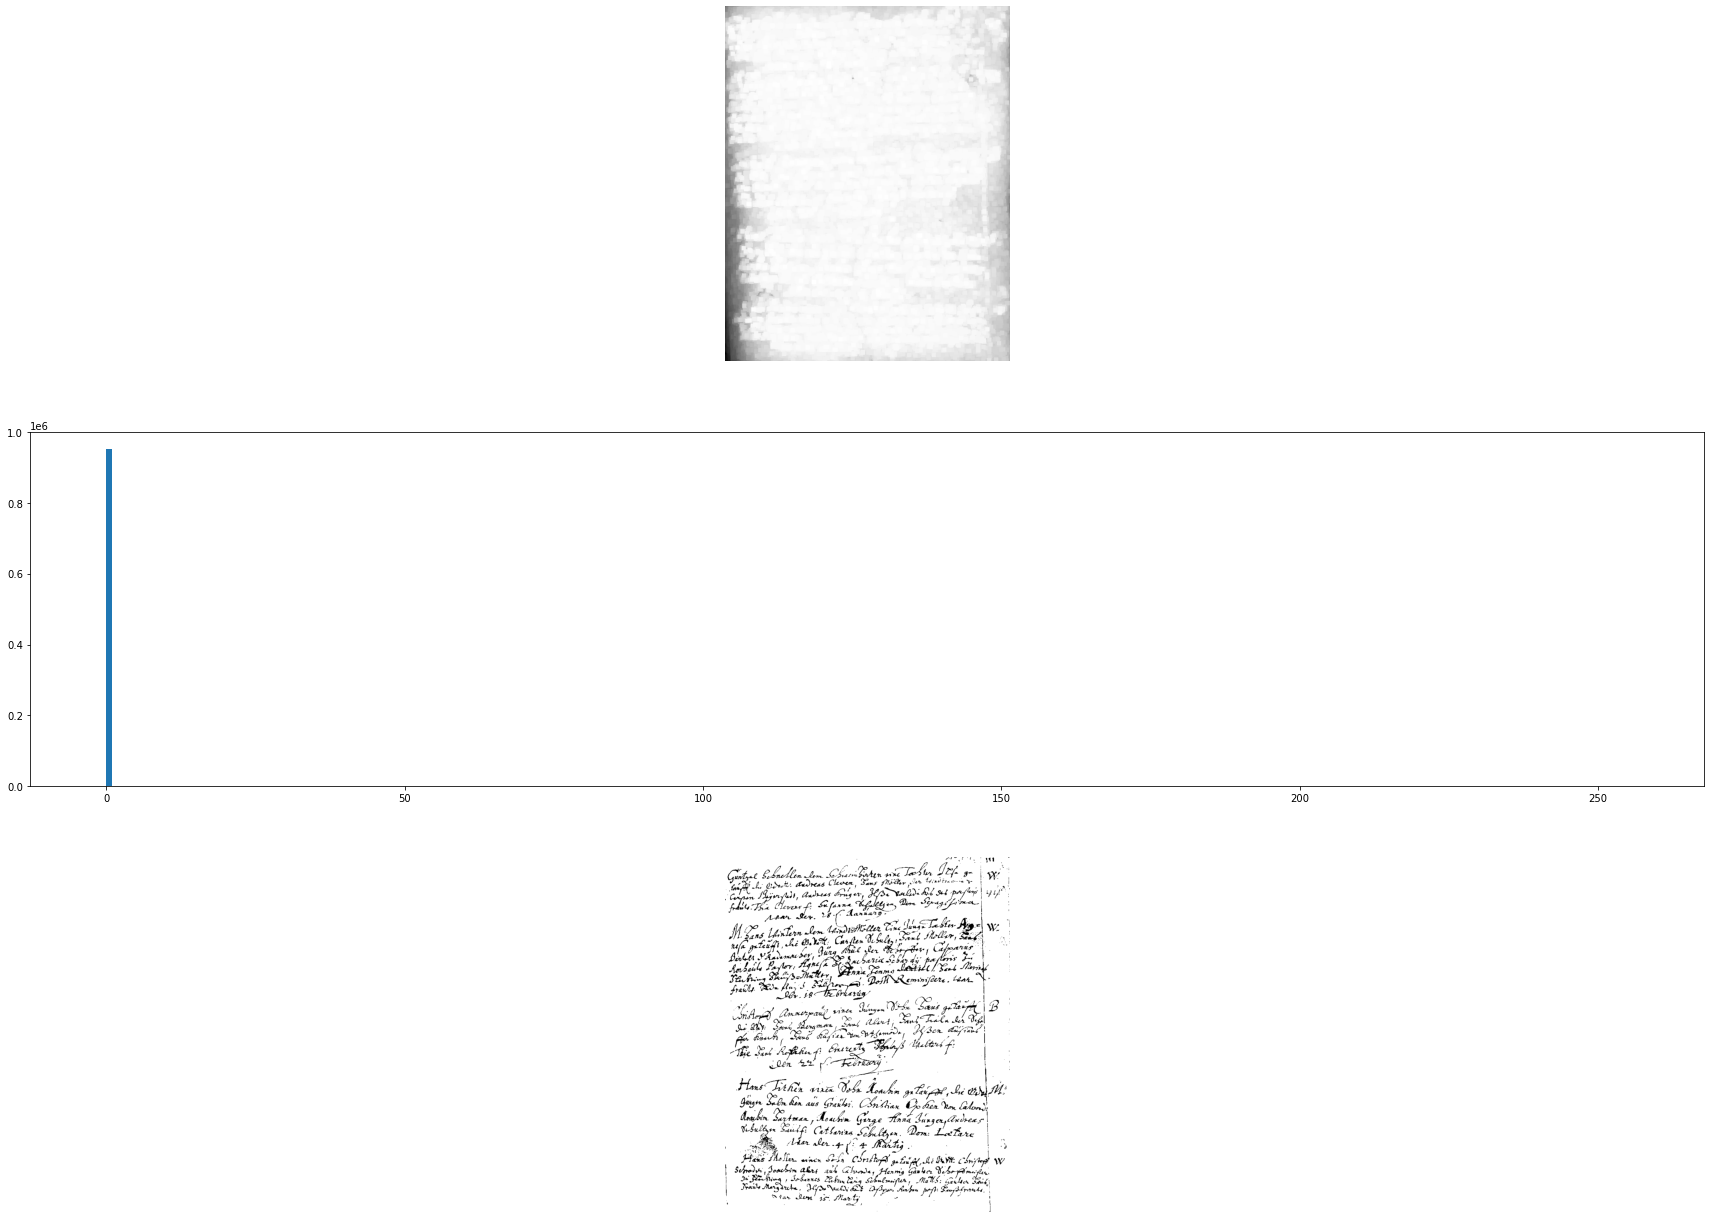

In [127]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread
from skimage.filters.rank import mean
from skimage.filters.rank import maximum
import skimage.morphology as morph

# initialize image variables
img = imread('schrift.png').astype(float)/255
img2 = imread('pebbles.jpg').astype(float)/255


# Shading causing problems 
thresh = threshold_otsu(img)
segment = img > thresh 


# Solving shading problems 

# computing shading image by employing rank filter 
#shading_img1 = mean(img, np.ones((5,5)))
#shading_img2 = mean(img, np.ones((10,10)))



shading_img1 = maximum(img, morph.square(13))

# apply formula given in slides : original image / shading image
img_corrected1 = img / shading_img1


# normalize image 
img_corrected1 *= (255.0/img_corrected1.max())

# apply threshold to corrected image 
segments3 = img_corrected1 > threshold_otsu(img_corrected1)


# plotting results

plt.figure(figsize=(30, 30))
# shading causing problems...
plt.subplot(4,1,1); plt.axis('off'); plt.imshow(shading_img1)
plt.subplot(4,1,2); plt.hist(img.flatten(), 256, (0,255))

# ... and solved version
plt.subplot(4,1,3); plt.axis('off'); plt.imshow(segments3)

#plt.subplot(4,1,4); plt.hist(img.flatten(), 256, (0,255))

plt.show()


## Assignment 2: Pyramid representation [5 Points]

**a)** What is the *Gaussian pyramid*? How does the **reduce** operation work? Explain in your own words what low pass filtering is and why it should be used when building the pyramid? Implement the **reduce** operation and generate a figure similar to the one on (CV-07 slide 32).

YOUR ANSWER HERE

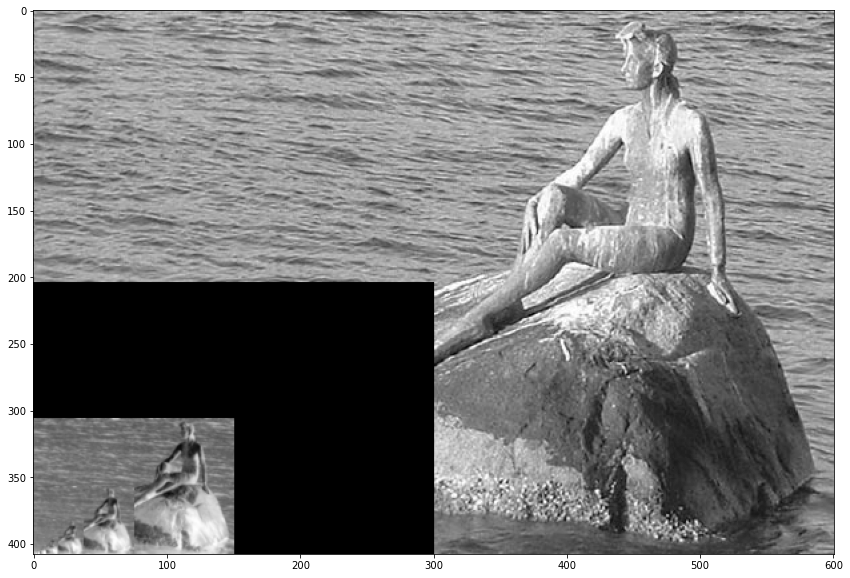

In [113]:
%matplotlib inline
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from imageio import imread
from scipy.ndimage.filters import convolve, convolve1d

# Reduced Operation applied 

img = imread('mermaid.png')

pyramid_image = img
h, w = img.shape

filter1d_down = 1/16 * np.array([1,4,6,4,1])
kernel = np.outer(filter1d_down, filter1d_down)

def reduce(img):
    current_level = convolve(img, kernel)
    return 255 * current_level[::2,::2] / current_level.max()
    
reduced_levels = []
current_level = img
while True:
    current_level = reduce(current_level)
    if current_level.size < 4:
        break
    reduced_levels.append(current_level.copy())
    pyramid_image[-current_level.shape[0]:,:current_level.shape[1]] = current_level

plt.figure(figsize=(15,10))
plt.gray()
plt.imshow(pyramid_image)
plt.show()

**b)** What is the **expand** operation? Why can the **reduce** operation not be inverted? Implement the **expand** operation and generate an image similar to the one on (CV-07 slide 34).

It cannot be inverted because when reducing you are summarizing 4 pixels to one, which is possible. However, you cannot form 1 pixel to 4 different ones. Therefore, Pixels of a certain level are generated by interpolation. Some pixels exist on both scaling levels (1/8), whereas some pixel exist only on level i+1 (1/7). The expand operation yields a blurred image due to the fact that the reduce operation can not be inverted.

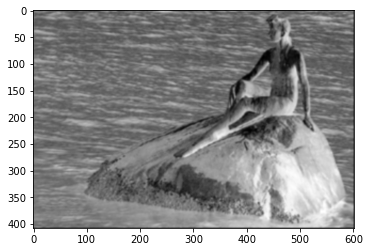

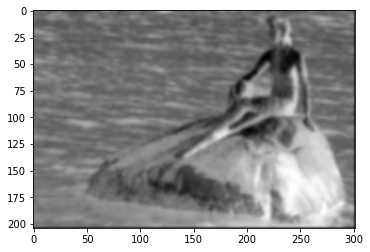

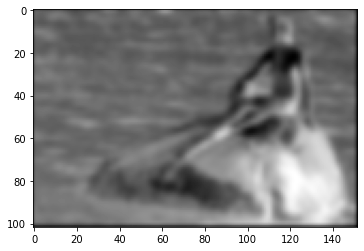

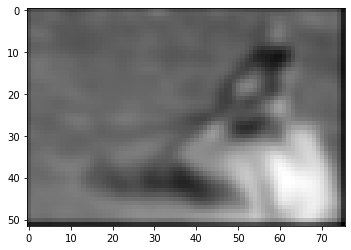

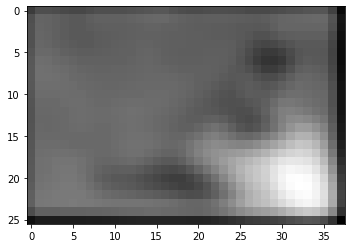

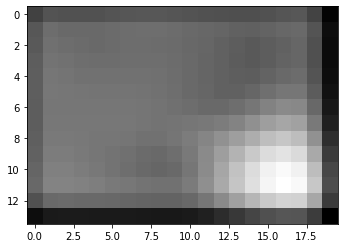

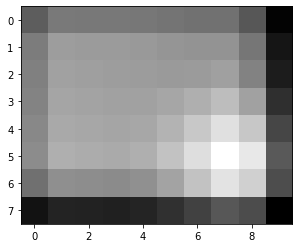

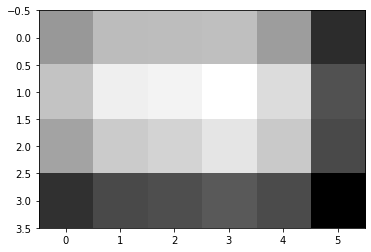

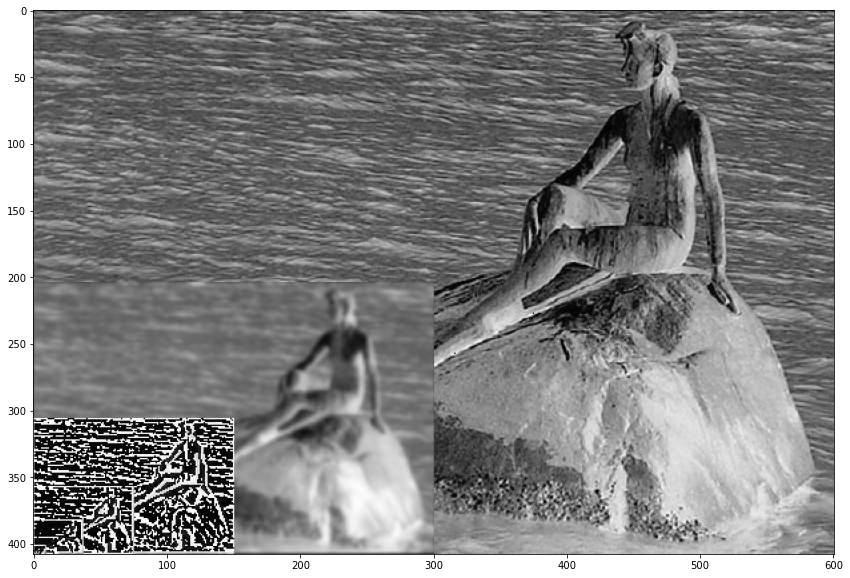

In [118]:
%matplotlib inline
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from imageio import imread

img = imread('mermaid.png')

def expand(img, new_size=None):
    # This is what opencv pyrUp does. No idea how to do it myself. 
    # Quote: "The function performs the upsampling step of the 
    # Gaussian pyramid construction, though it can actually 
    # be used to construct the Laplacian pyramid. First, it 
    # upsamples the source image by injecting even zero rows 
    # and columns and then convolves the result with the same 
    # kernel as in pyrDown() multiplied by 4."
    new_size = new_size or (2*img.shape[0], 2*img.shape[1])
    image_up = np.zeros(new_size) # odd number of rows or cols will get rounded
    # down during reduce. Here we simply make the output as big as desired,
    # hopefully no one will notice
    image_up[::2, ::2] = img
    return convolve(image_up, 4 * kernel, mode='constant')

steps = 4
pyramid_image = np.zeros((img.shape[0] + (2 ** steps), img.shape[1] + (2 ** steps)))

expanded_levels = []
for r in reduced_levels:
    current_level = expand(r)
    plt.imshow(current_level)
    plt.show()
    expanded_levels.append(current_level.copy())

pyramid_image = img
current_level = img
while True:
    sz = current_level.shape
    reduced = reduce(current_level)
    expanded = expand(reduced, new_size=sz)
    if current_level.size < 4:
        break
    pyramid_image[-current_level.shape[0]:,:current_level.shape[1]] = expanded - current_level
    current_level = reduced


plt.figure(figsize=(15,10))
plt.gray()
plt.imshow(pyramid_image)
plt.show()

## Assignment 3: Texture Segmentation [5 Points]

**a)** What is texture? Try to define it in your own words. Can there be a standard definition? What problems do you expect for texture based segmentation? 

Tactile texture refers to the tangible feel of a surface and visual texture refers to see the shape or contents of the image. In the image processing, the texture can be defined as a function of spatial variation of the brightness intensity of the pixels. Texture is the main term used to define objects or concepts of a given image. Texture analysis plays an important role in computer vision cases such as object recognition, surface defect detection, pattern recognition, medical image analysis, etc. Actually, there is no hard definition of texture existing. However, one can say that an image region exhibits texture if there is a common property of neighboring groups of pixels.

**b)** What is a co-occurence matrix? How can it be used to characterize texture?

A co-occurrence matrix or co-occurrence distribution is a matrix that is defined over an image to be the distribution of co-occurring pixel values (grayscale values, or colors) at a given offset. It is used as an approach to texture analysis with various applications especially in medical image analysis. The co-occurence matrix represents the correlation of given pixels. The co-occurrence matrix is still containing an abundance of information, given the amount of gray/color values. Therefore texture features are extracted from the co-occurrence matrix.


**c)** Implement a function to compute the co-occurence matrix of an image (patch). Apply it and compare your results to (CV-07 slide 54).

1600


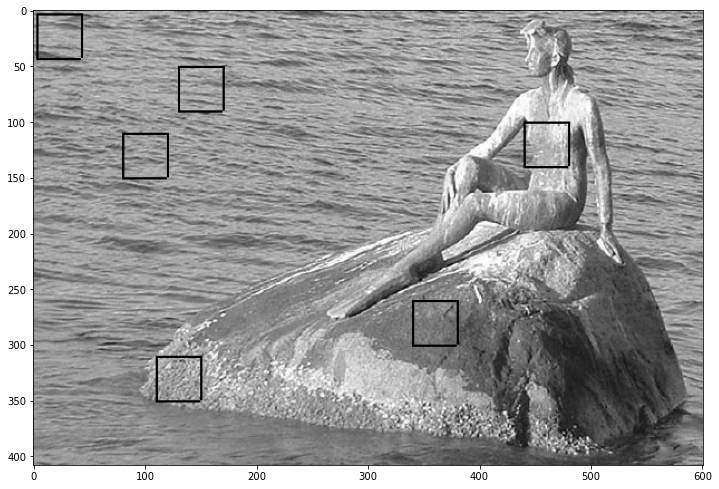

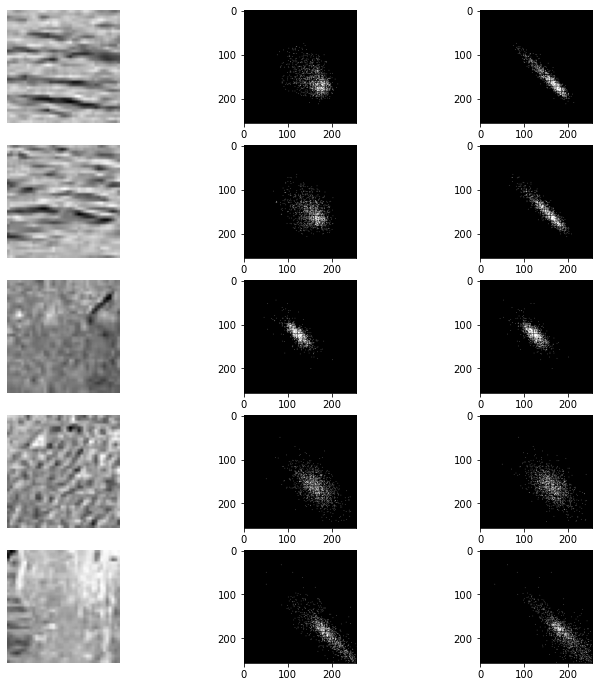

In [129]:
%matplotlib inline
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
import imageio 
from itertools import product

img = imageio.imread('mermaid.png')#, mode='L')

def get_patch(img, x, y, size=40):
    """
    Extract a rectangular patch from an image and mark it in the original image.
    
    Args:
        img (nndarray): Input image.
        x (uint): X-coordinate.
        y (uint): Y-coordinate.
        size (uint): Size of the patch.
        
    Returns:
        result: The extracted patch.
    """
    result = img[x:x+size,y:y+size].copy()
    img[x:x+size, [y,y+1,y+size,y+size+1]] = 0
    img[[x,x+1,x+size,x+size+1], y:y+size] = 0
    return result

patches = []
print(get_patch(img, 3,3).size)
patches.append(get_patch(img, 50,130))
patches.append(get_patch(img, 110,80))
patches.append(get_patch(img, 260,340))
patches.append(get_patch(img, 310,110))
patches.append(get_patch(img, 100,440))


def deltaFunction(x):
    """
    If x == 0 : result = 1 
    else : result = 0 
    """
    
    if x == 0 : 
        result = 1
    
    else: 
        result = 0
        
    return result


def cooccurrence(img, dx=1, dy=1):
    """
    Compute a co-occurence matrix for the given image.
    
    Args:
        img          the grayscale image (uint8)
        dx,dy        the offset between the two reference points

    Returns:
        matrix       the co-occurence matrix
    """
    
    matrix = np.zeros((256,256))
    h, w = img.shape
    assert (dx, dy) != (0, 0), "Directional vector cannot be zero length."

    # first we computed index array to shave off the pixels which cannot have
    # neihbours in the given direction at the given distance
    if dx > 0 and dy > 0:
        indices = (np.arange(0, h-dx), np.arange(0, w-dy))
        indices_shift = (np.arange(dx, h), np.arange(dy, w))
    elif dx == 0 and dy > 0:
        indices = (np.arange(0, h), np.arange(0, w-dy))
        indices_shift = (np.arange(0, h), np.arange(dy, w))
    elif dx > 0 and dy == 0:
        indices = (np.arange(0, h-dx), np.arange(0, w))
        indices_shift = (np.arange(dx, h), np.arange(0, w))
    elif dx == 0 and dy < 0:
        indices = (np.arange(0, h), np.arange(-dy, w))
        indices_shift = (np.arange(0, h), np.arange(0, w-dy))
    elif dx < 0 and dy == 0:
        indices = (np.arange(-dx, h), np.arange(0, w))
        indices_shift = (np.arange(0, h-dx), np.arange(0, w))
    elif dx < 0 and dy < 0:
        indices = (np.arange(-dx, h), np.arange(-dy, w))
        indices_shift = (np.arange(0, h+dx), np.arange(0, w+dy))
    else:
        raise Exception("I can't deal with this situation.")

    def delta(arr):
        return arr == 0

    # we only need to loop over the values which actually occur in the patch
    for (g1, g2) in product(np.arange(img.min(), img.max()+1), np.arange(img.min(), img.max()+1)):

        # apparently, using integer arrays as indices is different from slices,
        # for some unknown reason. Dunno what it does, but np.ix_ yields arrays
        # that do what you would expect
        patch_g1 = delta(img[np.ix_(*indices)] - g1)
        patch_g2 = delta(img[np.ix_(*indices_shift)] - g2)

        # patch_g1.size == patch_g2.size
        matrix[g1, g2] = 1/patch_g1.size * (patch_g1 * patch_g2).sum()

    return matrix


plt.figure(figsize=(12, 12))
plt.gray()
plt.imshow(img)
plt.show()


plt.figure(figsize=(12, 12))
i = 0
for p in patches:
    plt.subplot(len(patches),3,i+1); plt.axis('off'); plt.imshow(p)
    plt.subplot(len(patches),3,i+2); plt.imshow(cooccurrence(p,1,0) > 0)
    plt.subplot(len(patches),3,i+3); plt.imshow(cooccurrence(p,0,1) > 0)
    i += 3
plt.show()

## Assignment 4: Region merging [5 Points]

Implement the *region merging* algorithm (CV-07 slide 39) and apply it to the image `segments.png` (or some part of it). Use a simple *homogeneity condition*, e.g. that the maximal difference between gray values in a segment is not larger than a given threshold.

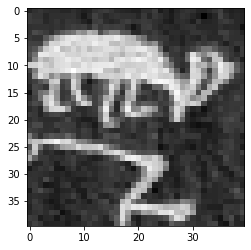

In [134]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import imageio
import warnings
warnings.filterwarnings('ignore')

from collections import namedtuple
Pixel = namedtuple('Pixel', ['i', 'j', 'v'])

class Graph:
    def __init__(self):
        self.edges = set()
    def add_edge(self, edge):
        self.edges.add(edge)
    def remove_edge(self, edge):
        self.edges.remove(edge)
    def merge_regions(self, region, replacement):
        for edge in self.edges.copy():
            if edge.source == region:
                edge.dest = replacement
                self.remove_edge(edge)
            if edge.dest == region:
                edge.source = replacement
                self.remove_edge(edge)
        # print("Num edges: %d" % len(self.edges))

class Edge:

    def homogeneous(self, threshold):
        pixels = list(map(lambda p: p.v, self.source.pixels.union(self.dest.pixels)))
        return (max(pixels) - min(pixels)) < threshold

    def __init__(self, r1, r2):
        self.source = r1
        self.dest = r2

class Region:
    def __init__(self, pixels, label):
        self.pixels = set(pixels)
        self.label = label

    def merge(self, other):
        return Region(self.pixels.union(other.pixels), self.label)


img = imageio.imread('segments.png')[:40,:40]

plt.imshow(img)
plt.show()




warnings.filterwarnings('ignore')

## Bonus: Painting with a webcam using color detection [0 points]


### Testing your webcam: Images
From now on we will try to make the exercises a bit more interactive and use live feed from your webcam. Unfortunately, using the webcam may not always work out of box (depending on your hardware/os configuration). So first make sure that you can grab an image from the webcam.

1. Use the `imageio` library as presented in the tutorial sessions. You will probably need to install `ffmpeg` packages as shown in the tutorial code.
1. Use the `cv2` library (opencv will use `gstreamer`). You will probably need to install then `opencv` package.

Hint: Sometimes it helps to restart the kernel.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# Set this flag to either use "imageio" or "cv2"
use_imageio = True
if use_imageio:
    # use imageio for accessing the webcam (requires ffmpeg to be installed on your computer)
    import imageio
    try:
        reader = imageio.get_reader('<video0>')
        img = reader.get_next_data()
        ok = True
        reader.close()
    except:
        ok = False
else:
    # use opencv for accessing the webcam
    import cv2
    camera = cv2.VideoCapture(0)
    ok, img = camera.read()
    camera.release()
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

if ok:
    plt.imshow(img)
    plt.show()
else:
    print("Accessing your webcam failed.")

### Testing your webcam: Video
You can now test your webcam with video. You can either select the methods presented in the tutorial session, namely `imageio` and `opencv`, or use `cvloop`. We recommend using the first method.

**imageio**


To test imageio run the following code

In [ ]:
%matplotlib notebook
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import imageio

try:
    display(HTML("press <kbd>I</kbd>, <kbd>I</kbd> (Kernel Interrupt) to stop the demo!"))
    with imageio.get_reader('<video0>') as webcam:
        fig = plt.figure(figsize=(8,6))
        mpl_image = plt.imshow(webcam.get_next_data())

        while True:
            img = webcam.get_next_data()
            mpl_image.set_data(img)
            fig.canvas.draw()
except KeyboardInterrupt:
    print("Interrupted")
finally:
    webcam.close()
    plt.close(fig)
    print("Camera was closed.")

**cvloop**

Atlernatively you can use `cvloop`. To install `cvloop` first activate your cv environment and then run the follwing cell. We recommend using

In [ ]:
!pip install cvloop

Check that it works by executing the cell below:

In [ ]:
from cvloop import cvloop
cvl = cvloop(function=lambda frame: 255 - frame, side_by_side=True)

### a)
In this task we will track a small colored object (like the cap of a pen) in front of a neutral background of a different color. We will use the location of the object to paint on a virtual canvas. For that you have to implement the following tasks in the `draw_func` function:

* Convert the image `img` given to the `draw_func` into HSV color space. 
* Measure the color of your object. You may return the converted image and interactively measure the color with your mouse. Define your measured hue value in a constant
* Discard all channel except the hue channel. 
* Find the location with the most similar hue to the measured hue of your object.
* Paint a marker, for example a circle, at this position in `img_draw`.


In [ ]:
%matplotlib inline

import imageio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from skimage.color import rgb2hsv
from skimage.draw import disk

# Adapt this hue value to the hue of your object
hue = .2

# A global canvas to draw on
canvas = np.zeros((480,640,3), np.uint8) 

# radius and color of the brush
radius = 5
color = (255,255,255)

# saturation threshold for object
thresh = .2

def draw_func(img):
    """
    Draw a circle on img_draw at the detected object location.
    
    Args:
        img          the RGB input image (uint8)

    Returns:
        img_draw     img with circle drawn at postion of object
    """
    global canvas, hue, radius, color
    
    # YOUR CODE HERE
    
    
    return canvas



# Make a figure and axes with dimensions as desired.
fig = plt.figure(figsize=(8, 1))
ax = fig.add_axes([0.05, 0.80, 0.9, 0.15])
cb = mpl.colorbar.ColorbarBase(ax, cmap=mpl.cm.hsv, orientation='horizontal',
                               norm=mpl.colors.Normalize(vmin=0, vmax=1))
cb.set_ticks([hue])
cb.set_label('the hue value')
plt.show()

First test your function with single image. You may either grab an image from your webcam (as described above), or choose an arbitrary image from wherever you like

In [ ]:

%matplotlib inline
import matplotlib.pyplot as plt

draw_func(img)
plt.subplot(1,2,1); plt.imshow(img)
plt.subplot(1,2,2); plt.imshow(canvas)
plt.show()

Now run your function on video with imageio or alternatively with cvloop

In [ ]:
# imageio
%matplotlib notebook
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import imageio

try:
    display(HTML("press <kbd>I</kbd>, <kbd>I</kbd> (Kernel Interrupt) to stop the demo!"))
    with imageio.get_reader('<video0>') as webcam:
        fig = plt.figure(figsize=(12,6))
        plt.subplot(1,2,1)
        mpl_image1 = plt.imshow(webcam.get_next_data())
        plt.subplot(1,2,2)
        mpl_image2 = plt.imshow(webcam.get_next_data())

        while True:
            img = webcam.get_next_data()
            # mirror the image to make drawing easier
            img = img[:,::-1,:]
            img_processed = draw_func(img)
            mpl_image1.set_data(img)
            mpl_image2.set_data(img_processed)
            fig.canvas.draw()
except KeyboardInterrupt:
    print("Interrupted")
finally:
    webcam.close()
    plt.close(fig)
    print("Camera was closed.")

In [ ]:
# cvloop
%matplotlib notebook
from cvloop import cvloop

# Now use cvloop to run the algorithm live on webcam data     
cvl = cvloop(function=draw_func, side_by_side=True)